In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marmara-region-earthquakes-apr-2324-2025/deprem_son24saat_duzenli.csv


In [2]:
df = pd.read_csv("/kaggle/input/marmara-region-earthquakes-apr-2324-2025/deprem_son24saat_duzenli.csv")
df.head(5)

,Olus_Zamani,Enlem,Boylam,Derinlik_km,Buyukluk,Yer
0,2025.04.23 13:01:02,40.8427,28.3802,21.3,4.3,MARMARA DENIZI
1,2025.04.23 13:02:32,40.8640,28.4223,18.7,5.2,MARMARA DENIZI
2,2025.04.23 13:05:43,40.8213,28.2977,12.3,3.3,MARMARA DENIZI
3,2025.04.23 13:06:59,40.8662,28.4270,22.9,3.6,MARMARA DENIZI
4,2025.04.23 13:07:30,40.8252,28.3233,11.0,3.3,MARMARA DENIZI


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Olus_Zamani  289 non-null    object 
 1   Enlem        289 non-null    float64
 2   Boylam       289 non-null    float64
 3   Derinlik_km  289 non-null    float64
 4   Buyukluk     289 non-null    float64
 5   Yer          289 non-null    object 
dtypes: float64(4), object(2)
memory usage: 13.7+ KB


In [4]:
# Ensure that the columns 'Derinlik_km' and 'Buyukluk' are numeric
df['Derinlik_km'] = pd.to_numeric(df['Derinlik_km'], errors='coerce')  # Convert to numeric, NaN for errors
df['Buyukluk'] = pd.to_numeric(df['Buyukluk'], errors='coerce')  # Convert to numeric

# Clean spaces in the Olus_Zamani column
df['Olus_Zamani'] = df['Olus_Zamani'].str.strip()  # Remove excess spaces before conversion
df['Olus_Zamani'] = pd.to_datetime(df['Olus_Zamani'], format='%Y.%m.%d %H:%M:%S', errors='coerce')  # Convert to datetime



In [5]:
#Descriptive data analysis
print("Descriptive statistics:")
print(df.describe())

Descriptive statistics:
                         Olus_Zamani       Enlem      Boylam  Derinlik_km  \
count                            289  289.000000  289.000000   289.000000   
mean   2025-04-23 20:05:35.768166144   40.676970   28.502753    14.656747   
min              2025-04-23 13:01:02   35.756200   25.668000     1.200000   
25%              2025-04-23 15:12:57   40.839300   28.305300    11.500000   
50%              2025-04-23 18:51:26   40.850800   28.381800    14.300000   
75%              2025-04-23 23:47:21   40.862500   28.419300    19.500000   
max              2025-04-24 12:06:39   40.991500   40.216000    29.600000   
std                              NaN    0.721588    1.301043     5.984137   

         Buyukluk  
count  289.000000  
mean     2.446713  
min      1.200000  
25%      1.900000  
50%      2.300000  
75%      2.900000  
max      5.200000  
std      0.706073  


In [6]:
#Counts events by region
print("\nEvent number by region:")
region_counts = df['Yer'].value_counts()
print(region_counts.head(10))


Event number by region:
Yer
MARMARA DENIZI                                                                        215
GURPINAR ACIKLARI-ISTANBUL (MARMARA DENIZI)                                            25
SILIVRI ACIKLARI-ISTANBUL (MARMARA DENIZI)                                             24
EGE DENIZI                                                                              3
YEMISLI-SIMAV (KUTAHYA)                                                                 3
AVCILAR ACIKLARI-ISTANBUL (MARMARA DENIZI)                                              3
HIMMETLI-(NIGDE)                                                                        1
MIDILLI ADASI GUNEYI (EGE DENIZI)                                                       1
MARMARA DENIZI                                    REVIZE01   (2025.04.23 14:57:35)      1
KERTMEKARACAOREN-ULAS (SIVAS)                                                           1
Name: count, dtype: int64


Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [8]:
#Configure the sizes
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Number of events')

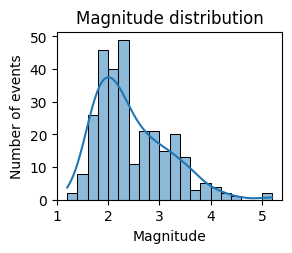

In [9]:
#Magnitude distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Buyukluk'], bins=20, kde=True)
plt.title('Magnitude distribution')
plt.xlabel('Magnitude')
plt.ylabel('Number of events')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Number of events')

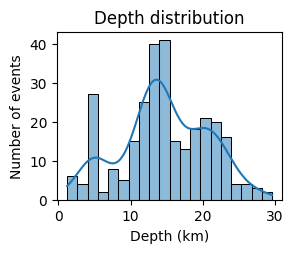

In [10]:
#Depth distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Derinlik_km'], bins=20, kde=True)
plt.title('Depth distribution')
plt.xlabel('Depth (km)')
plt.ylabel('Number of events')

Text(0, 0.5, 'Depth (km)')

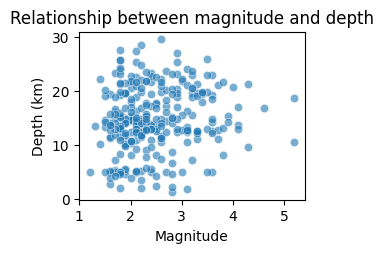

In [11]:
#Relationship between magnitude and depth
plt.subplot(2, 2, 3)
sns.scatterplot(x='Buyukluk', y='Derinlik_km', data=df, alpha=0.6)
plt.title('Relationship between magnitude and depth')
plt.xlabel('Magnitude')
plt.ylabel('Depth (km)')


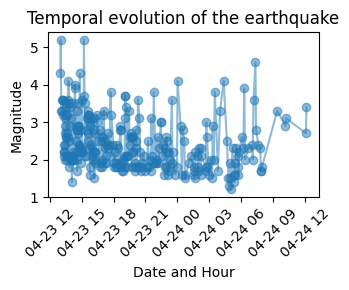

In [12]:
#Temporal evolution of the earthquake
plt.subplot(2, 2, 4)
plt.plot(df['Olus_Zamani'], df['Buyukluk'], 'o-', alpha=0.5)
plt.title('Temporal evolution of the earthquake')
plt.xlabel('Date and Hour')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.tight_layout()


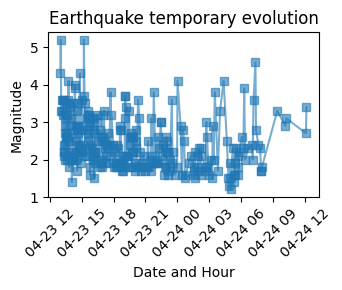

In [13]:
#earthquake temporary evolution
plt.subplot(2, 2, 4)
plt.plot(df['Olus_Zamani'], df['Buyukluk'], 's-', alpha=0.6)
plt.title('Earthquake temporary evolution')
plt.xlabel('Date and Hour')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.tight_layout()

create maps and perform geographic analyses using cartopy
detect clusters of arbitrary shape and to manage noise points or outliers using DBSCAN
Using Cartopy and DBSCAN together allows you to visualize geographic clusters on maps.

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


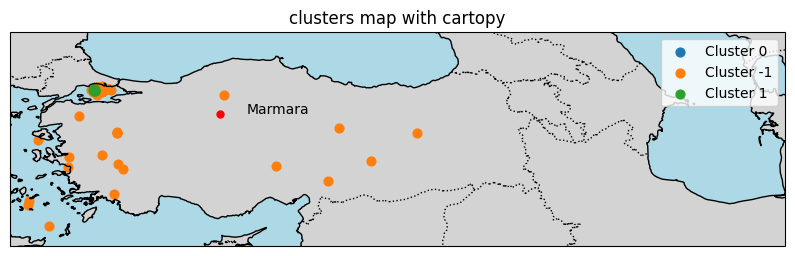

In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.cluster import DBSCAN

#  Clustering with DBSCAN
coords = df[['Enlem', 'Boylam']].values
dbscan = DBSCAN(eps=0.02, min_samples=5).fit(coords)
df['cluster'] = dbscan.labels_

#  Map
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

#  Adding background of map
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

#  Gepgraphic extent
ax.set_extent([25, 54, 35, 43], crs=ccrs.PlateCarree())

#  Plot the DataFrame points according to the clusters
for cluster_id in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_id]
    ax.scatter(cluster_data['Boylam'], cluster_data['Enlem'],
               label=f"Cluster {cluster_id}", s=40, transform=ccrs.PlateCarree())

#  Adding a specific point
ax.plot(32.8597, 39.9334, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
ax.text(32.8597 + 1, 39.9334, 'Marmara', transform=ccrs.PlateCarree())


plt.title('clusters map with cartopy')
plt.legend()
plt.show()


In [15]:
from pyproj import Transformer

# Create a transformer (WGS84 -> UTM zone 36N)
transformer = Transformer.from_crs("EPSG:4326", "EPSG:32636", always_xy=True)

# Transformer function
def convert_coords(lon, lat):
    return transformer.transform(lon, lat)

# Application on the dataframe
df[['X', 'Y']] = df.apply(lambda row: convert_coords(row['Boylam'], row['Enlem']), axis=1, result_type='expand')

# Visualization
print(df[['Enlem', 'Boylam', 'X', 'Y']].head())

     Enlem   Boylam              X             Y
0  40.8427  28.3802  110483.921629  4.531577e+06
1  40.8640  28.4223  114158.555585  4.533756e+06
2  40.8213  28.2977  103397.904936  4.529572e+06
3  40.8662  28.4270  114567.613156  4.533980e+06
4  40.8252  28.3233  105580.928644  4.529889e+06


In [16]:
from sklearn.cluster import DBSCAN

coords_proj = df[['X', 'Y']].values
dbscan = DBSCAN(eps=10000, min_samples=5).fit(coords_proj)  #epsilon in metres
df['cluster_proj'] = dbscan.labels_


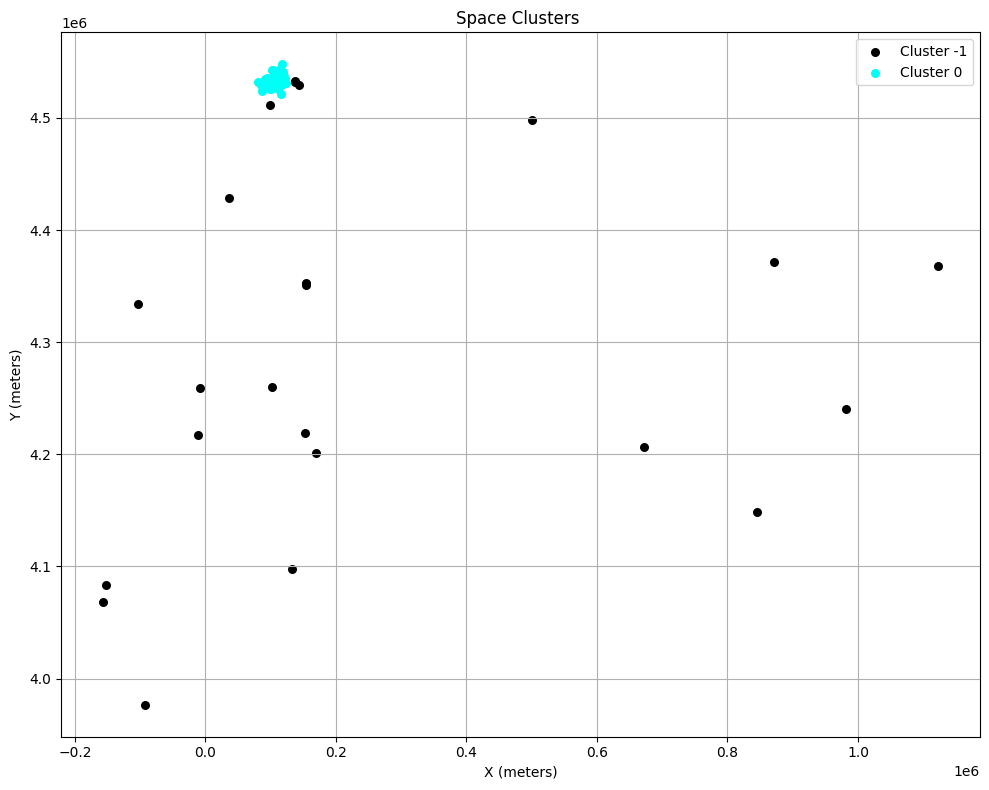

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns  

#  Clustering pn projected coordinates
coords_proj = df[['X', 'Y']].values
dbscan = DBSCAN(eps=10000, min_samples=5).fit(coords_proj)  # epsilon = 10 km
df['cluster_proj'] = dbscan.labels_

# Créate a color palette
num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
palette = sns.color_palette("hsv", num_clusters)

# Trace the points
plt.figure(figsize=(10, 8))

for cluster_id in sorted(df['cluster_proj'].unique()):
    color = 'k' if cluster_id == -1 else palette[cluster_id % len(palette)]
    subset = df[df['cluster_proj'] == cluster_id]
    plt.scatter(subset['X'], subset['Y'], s=30, color=color, label=f"Cluster {cluster_id}")

plt.title("Space Clusters ")
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


([<matplotlib.axis.XTick at 0x7a2464968c10>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

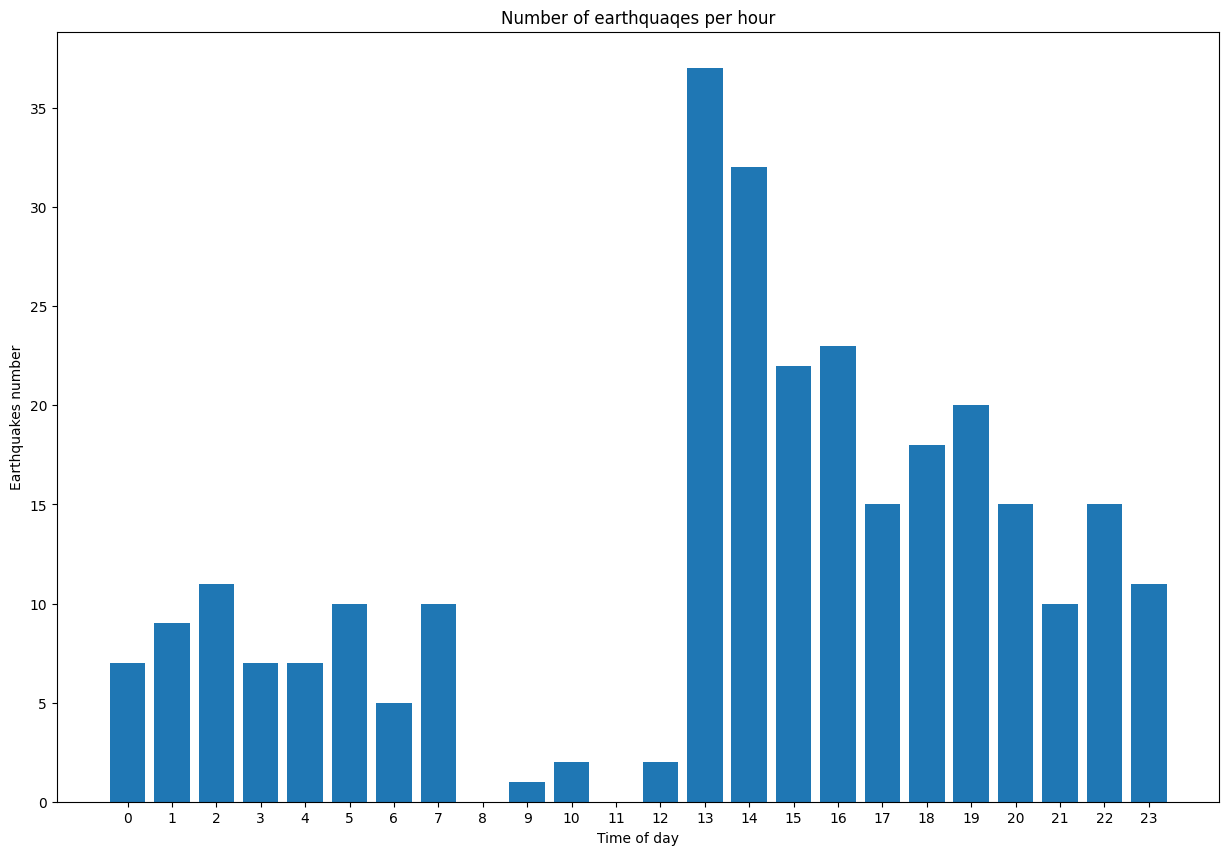

In [18]:
#Depth temporal analysis
plt.figure(figsize=(15, 10))
# Créate a temporal histogram
df['hour'] = df['Olus_Zamani'].dt.hour
hourly_count = df.groupby('hour').size()
plt.bar(hourly_count.index, hourly_count.values)
plt.title('Number of earthquaqes per hour')
plt.xlabel('Time of day')
plt.ylabel('Earthquakes number')
plt.xticks(range(0, 24))

Peak activity: A notable peak is observed around 1 p.m., indicating a high number of events.
Overall distribution: The bars show an uneven distribution, with some times of day having significantly more events than others.
Frequency: The hours between 12 and 4 p.m. seem to show the highest number of events.

In [19]:
# Identification of replicas
# Sort by time
df_sorted = df.sort_values('Olus_Zamani')

In [20]:

#Let's assume that the first major event is the main earthquake
main_event = df_sorted[df_sorted['Buyukluk'] >= 5.0].iloc[0]
print("\nProbable main earthquake:")
print(main_event[['Olus_Zamani', 'Buyukluk', 'Enlem', 'Boylam', 'Derinlik_km', 'Yer']])



Probable main earthquake:
Olus_Zamani    2025-04-23 13:02:32
Buyukluk                       5.2
Enlem                       40.864
Boylam                     28.4223
Derinlik_km                   18.7
Yer                 MARMARA DENIZI
Name: 1, dtype: object


In [21]:
# Identify aftershocks (events after the main earthquake)
aftershocks = df_sorted[df_sorted['Olus_Zamani'] > main_event['Olus_Zamani']]
print(f"\nNombre of potential aftershocks: {len(aftershocks)}")


Nombre of potential aftershocks: 287


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


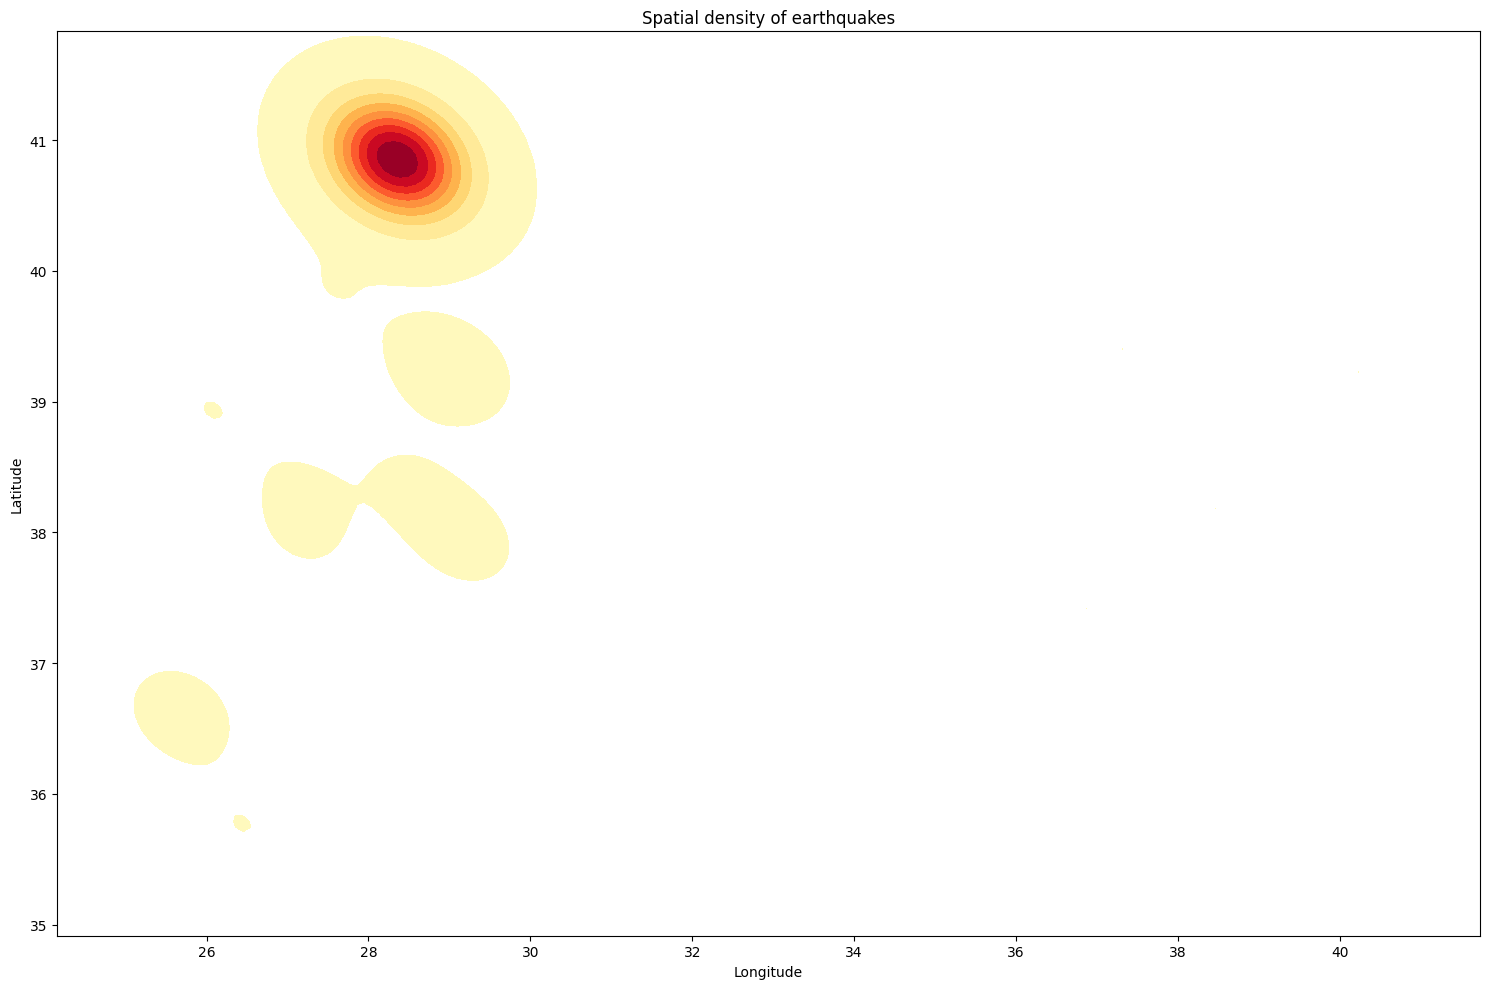

In [22]:
#Analyse of the spatial Distribution of events
plt.figure(figsize=(15, 10))
sns.kdeplot(x=df['Boylam'], y=df['Enlem'], cmap="YlOrRd", fill=True, thresh=0.05)
plt.title('Spatial density of earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()